In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


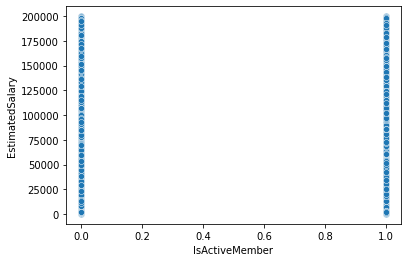

In [5]:

sns.scatterplot(x = 'IsActiveMember', y = 'EstimatedSalary', data= df)

In [6]:
X = df.drop(["Exited", 'RowNumber', 'CustomerId', 'Surname'],axis = 1)

In [7]:
y = df['Exited']

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
 lb = LabelEncoder()

In [10]:
X['Gender'] = lb.fit_transform(X['Gender'])

In [11]:
X 

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,0,42,2,0.00,1,1,1,101348.88
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58
2,502,France,0,42,8,159660.80,3,1,0,113931.57
3,699,France,0,39,1,0.00,2,0,0,93826.63
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64
9996,516,France,1,35,10,57369.61,1,1,1,101699.77
9997,709,France,0,36,7,0.00,1,0,1,42085.58
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52


In [12]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([("Geography", OneHotEncoder(), [1])], remainder = 'passthrough')
X = ct.fit_transform(X)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
# help(train_test_split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [17]:
X_train = scaler.fit_transform(X_train)

In [18]:

X_test = scaler.transform(X_test)

In [19]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [20]:
classifier = Sequential()

In [21]:
classifier.add(Dense(input_dim = 12, units = 8, kernel_initializer='uniform',
                     activation = 'relu'))

In [22]:
classifier.add(Dense(units = 8, kernel_initializer='uniform',
                     activation = 'relu'))

In [23]:
classifier.add(Dense(units = 1, kernel_initializer='uniform',
                     activation = 'sigmoid'))

In [24]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [25]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 104       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 185
Trainable params: 185
Non-trainable params: 0
_________________________________________________________________


In [26]:
results = classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
700/700 [==============================] - 14s 1ms/step - loss: 0.5511 - accuracy: 0.7926
Epoch 2/100
700/700 [==============================] - 1s 1ms/step - loss: 0.4388 - accuracy: 0.7853
Epoch 3/100
700/700 [==============================] - 1s 1ms/step - loss: 0.4049 - accuracy: 0.8020
Epoch 4/100
700/700 [==============================] - 1s 1ms/step - loss: 0.3956 - accuracy: 0.8281
Epoch 5/100
700/700 [==============================] - 1s 1ms/step - loss: 0.3882 - accuracy: 0.8322
Epoch 6/100
700/700 [==============================] - 1s 1ms/step - loss: 0.3738 - accuracy: 0.8306
Epoch 7/100
700/700 [==============================] - 1s 1ms/step - loss: 0.3779 - accuracy: 0.8344
Epoch 8/100
700/700 [==============================] - 1s 1ms/step - loss: 0.3756 - accuracy: 0.8481
Epoch 9/100
700/700 [==============================] - 1s 1ms/step - loss: 0.3759 - accuracy: 0.8457
Epoch 10/100
700/700 [==============================] - 1s 1ms/step - loss: 0.3717 - accur

In [27]:
accuracy = results.history['accuracy']

In [28]:
accuracy

[0.7977142930030823,
 0.7977142930030823,
 0.8092857003211975,
 0.8289999961853027,
 0.8289999961853027,
 0.8295714259147644,
 0.8408571481704712,
 0.8482857346534729,
 0.8498571515083313,
 0.8489999771118164,
 0.8505714535713196,
 0.8524285554885864,
 0.8551428318023682,
 0.8528571724891663,
 0.8558571338653564,
 0.8524285554885864,
 0.855571448802948,
 0.8557142615318298,
 0.8571428656578064,
 0.8602856993675232,
 0.8598571419715881,
 0.8595714569091797,
 0.8602856993675232,
 0.8615714311599731,
 0.859000027179718,
 0.8611428737640381,
 0.8592857122421265,
 0.8621428608894348,
 0.8598571419715881,
 0.8579999804496765,
 0.8612856864929199,
 0.8598571419715881,
 0.8614285588264465,
 0.8605714440345764,
 0.8614285588264465,
 0.8597142696380615,
 0.8592857122421265,
 0.8587142825126648,
 0.8575714230537415,
 0.8594285845756531,
 0.8598571419715881,
 0.8592857122421265,
 0.8602856993675232,
 0.8611428737640381,
 0.8621428608894348,
 0.8624285459518433,
 0.8621428608894348,
 0.858857154846

Text(0, 0.5, 'Accuracy')

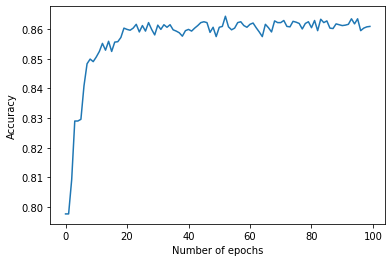

In [29]:
plt.plot(accuracy)
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')

In [30]:
y_pred = classifier.predict(X_test)

In [31]:
y_pred

array([[0.33272702],
       [0.455639  ],
       [0.19421408],
       ...,
       [0.05035192],
       [0.02759323],
       [0.778123  ]], dtype=float32)